#Partie (1): Exploration des données et construction du modele

In [ ]:
#1) Importation des données d'entrées :

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
data = pd.read_csv('/content/sample_data/bank.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
#data.describe(include="all")

#Pré-traitement des données
##Split Données categorielles
##Split Données numeriques
##Nettoyage et recodage 

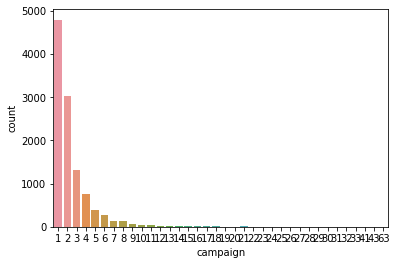

In [ ]:
import seaborn as sns
sns.countplot(x='campaign', data=data)

Nous allons prendre la variable Y comme target dans notre travail.

In [ ]:
y = data.deposit
y

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
11157     no
11158     no
11159     no
11160     no
11161     no
Name: deposit, Length: 11162, dtype: object

In [ ]:
data.drop('deposit', inplace=True, axis=1)

In [ ]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure


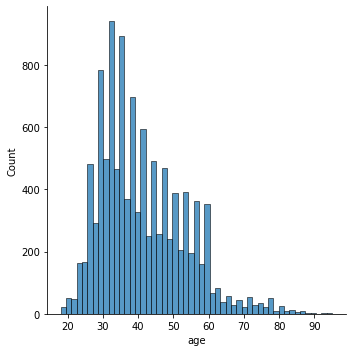

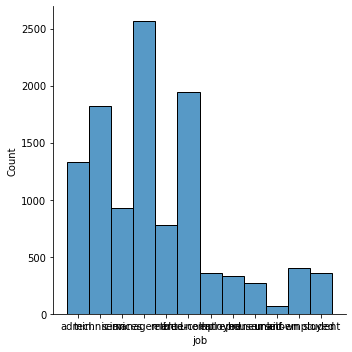

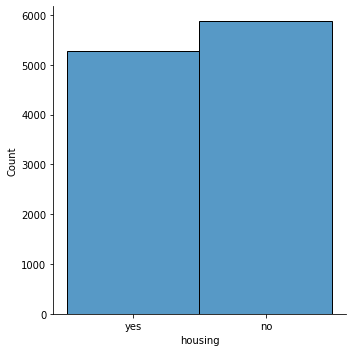

In [ ]:
sns.displot(data.age), sns.displot(data.job)
sns.displot(data.housing)


In [ ]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


In [ ]:
data.isna().sum() #Aucune valeure manquante.


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

#Separation des données

In [ ]:
cat_data = []
num_data = []

for i,c in enumerate(data.dtypes):
  if c == object:
    cat_data.append(data.iloc[:,i])
  else:
    num_data.append(data.iloc[:,i])

cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [ ]:
cat_data

,job,marital,education,default,housing,loan,contact,month,poutcome
0,admin.,married,secondary,no,yes,no,unknown,may,unknown
1,admin.,married,secondary,no,no,no,unknown,may,unknown
2,technician,married,secondary,no,yes,no,unknown,may,unknown
3,services,married,secondary,no,yes,no,unknown,may,unknown
4,admin.,married,tertiary,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,cellular,apr,unknown
11158,services,married,secondary,no,no,no,unknown,jun,unknown
11159,technician,single,secondary,no,no,no,cellular,aug,unknown
11160,technician,married,secondary,no,no,yes,cellular,may,failure


In [ ]:
num_data

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


#encodage des données categorical 

In [ ]:
cat_data = pd.get_dummies(cat_data)
cat_data

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11158,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
11159,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11160,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


#Target:recodage

In [ ]:
y_values = {"yes":1,"no":0}
y= y.map(y_values )
y


0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

#Données numeriques:

In [ ]:
num_data


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


#Concatenation

In [ ]:
#cat_data

In [ ]:
data_final = pd.concat([num_data, cat_data], axis = 1)

In [ ]:
data_final.shape

(11162, 51)

#Analyse des données:




#Standariser les données

In [ ]:
# Normaliser X_train
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X_Train_scaled = sc.fit_transform(data_final)
X_Train_scaled

array([[0.53246753, 0.10437133, 0.13333333, ..., 0.        , 0.        ,
        1.        ],
       [0.49350649, 0.07827282, 0.13333333, ..., 0.        , 0.        ,
        1.        ],
       [0.2987013 , 0.09218521, 0.13333333, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.18181818, 0.07809111, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.32467532, 0.07776175, 0.23333333, ..., 0.        , 0.        ,
        0.        ],
       [0.20779221, 0.07776175, 0.26666667, ..., 0.        , 0.        ,
        1.        ]])

#Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, x_val, Y_train, y_val = train_test_split(X_Train_scaled, y, test_size = 0.2, random_state = 101)

In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [ ]:
#y_train
X_train.shape, Y_train.shape

((8929, 51), (8929,))

#Modele

In [ ]:
#importations des modules 
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout 
import h5py
from keras.models import load_model

In [ ]:
data.shape, X_train.shape, Y_train.shape

((11162, 16), (8929, 51), (8929,))

In [ ]:
#initialisation du modèle
classifier=Sequential()
#Ajouter de la couche d'entrée et cachée

classifier.add(Dense(units=25,activation ="relu", kernel_initializer ="uniform",input_dim=51))
classifier.add(Dropout(rate=0.1))

#Ajouter des couches cachées
classifier.add(Dense(units=25,activation="relu",kernel_initializer="uniform"))
classifier.add(Dropout(rate=0.1))


classifier.add(Dense(units=25,activation="relu",kernel_initializer="uniform"))
classifier.add(Dropout(rate=0.1))

classifier.add(Dense(units=25,activation="relu",kernel_initializer="uniform"))
classifier.add(Dropout(rate=0.1))

#Ajouter de la couche de sortie
classifier.add(Dense(units=1, activation ="sigmoid",kernel_initializer="uniform"))

#Entrainnement & Evaluation du modele

In [ ]:
#Compilation du réseau de neurones

classifier.compile(loss='binary_crossentropy',
            optimizer="Adam",
            metrics=['binary_accuracy'])

In [ ]:
# # Entrainer le réseau de neurones
story = classifier.fit(X_train,Y_train,batch_size=10,validation_split = 0.2, epochs=5,validation_data=(x_val, y_val), shuffle=True)

Epoch 1/5
715/715 [==============================] - 16s 3ms/step - loss: 0.6341 - binary_accuracy: 0.6171 - val_loss: 0.4756 - val_binary_accuracy: 0.7772
Epoch 2/5
715/715 [==============================] - 2s 2ms/step - loss: 0.4328 - binary_accuracy: 0.8062 - val_loss: 0.4050 - val_binary_accuracy: 0.8253
Epoch 3/5
715/715 [==============================] - 2s 2ms/step - loss: 0.4139 - binary_accuracy: 0.8170 - val_loss: 0.3812 - val_binary_accuracy: 0.8376
Epoch 4/5
715/715 [==============================] - 2s 2ms/step - loss: 0.3962 - binary_accuracy: 0.8316 - val_loss: 0.3802 - val_binary_accuracy: 0.8320
Epoch 5/5
715/715 [==============================] - 2s 2ms/step - loss: 0.3811 - binary_accuracy: 0.8394 - val_loss: 0.3717 - val_binary_accuracy: 0.8449


In [ ]:
out_of_sample_predictions = classifier.predict(x_val)
out_of_sample_predictions

array([[0.82276165],
       [0.01513618],
       [0.955999  ],
       ...,
       [0.64325744],
       [0.9884995 ],
       [0.69946355]], dtype=float32)

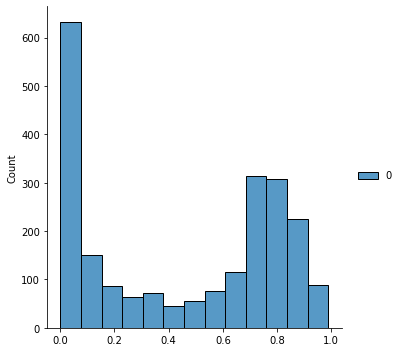

In [ ]:
import seaborn as sns
sns.displot(out_of_sample_predictions)


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend

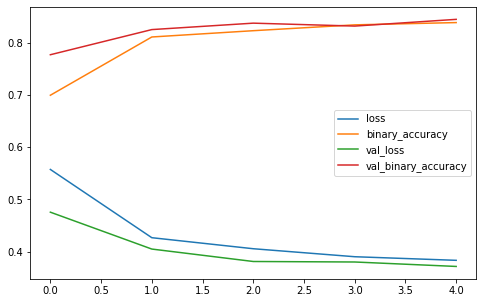

In [ ]:
import keras
from matplotlib import pyplot as plt
pd.DataFrame(story.history).plot(figsize=(8,5))
plt.show()


In [ ]:
# Daprés la figure ci-dessus: on peut dire que notre modele est valide. car la fonction de validation
# et la fonction d'entrainement sont stable presque sur la meme précision 0.90
# Idem pour la fonction des couts (loss) et val loss.
# on peut deduire que notre modele est bon. 

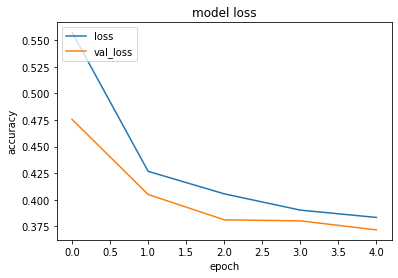

In [ ]:
#Un zoom sur loss et val_loss
plt.plot(story.history['loss'])
plt.plot(story.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

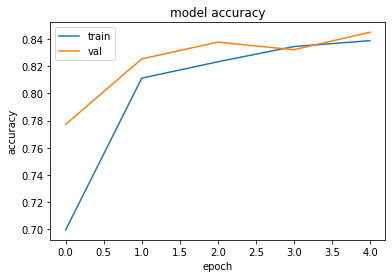

In [ ]:
#Un zoom sur binary accurency
plt.plot(story.history['binary_accuracy'])
plt.plot(story.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Comparaison

La régression logistique ou modèle logit est un modèle de régression binomiale. Comme pour tous les modèles de régression binomiale, il s'agit de modéliser au mieux un modèle mathématique simple à des observations réelles nombreuses.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(x_val)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_val, y_val)))

Accuracy of logistic regression classifier on test set: 0.83


In [ ]:
# notre modele n'est pas mal par rapport à la regression logistique


In [3]:

!cp '/content/drive/MyDrive/Colab Notebooks/Deep_Learning_Project.ipynb' ./

In [4]:
!jupyter nbconvert --to PDF '/content/drive/MyDrive/Colab Notebooks/Deep_Learning_Project.ipynb'


[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Deep_Learning_Project.ipynb to PDF
[NbConvertApp] Support files will be in Deep_Learning_Project_files/
[NbConvertApp] Making directory ./Deep_Learning_Project_files
[NbConvertApp] Making directory ./Deep_Learning_Project_files
[NbConvertApp] Making directory ./Deep_Learning_Project_files
[NbConvertApp] Making directory ./Deep_Learning_Project_files
[NbConvertApp] Making directory ./Deep_Learning_Project_files
[NbConvertApp] Making directory ./Deep_Learning_Project_files
[NbConvertApp] Making directory ./Deep_Learning_Project_files
[NbConvertApp] Making directory ./Deep_Learning_Project_files
[NbConvertApp] Writing 60641 bytes to ./notebook.tex
[NbConvertApp] Building PDF
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/application.py", line 267, in launch_instance
    return super(Jup